# Meteo: Air temperature (VPD) (2005-2024)

**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# Variable

In [1]:
varname = 'VPD_T1_47_1'
var = "VPD"  # Name shown in plots
units = "kPa"

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import diive as dv
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.bar import LongtermAnomaliesYear

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.1


# Load data

In [19]:
SOURCEDIR = r"../10_METEO"
FILENAME = r"12.5_METEO_GAPFILLED_2004-2024.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
keeplocs = (df.index.year >= 2005) & (df.index.year <= 2024)
df = df[keeplocs].copy()
df

Loaded .parquet file ..\10_METEO\12.5_METEO_GAPFILLED_2004-2024.parquet (0.026 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,LW_IN_T1_47_1,PA_T1_47_1,PPFD_IN_T1_47_1,RH_T1_47_1,SW_IN_T1_47_1,TA_T1_47_1,SW_IN_T1_47_1_gfXG,TA_T1_47_1_gfXG,PPFD_IN_T1_47_1_gfXG,VPD_T1_47_1,VPD_T1_47_1_gfXG,FLAG_VPD_T1_47_1_gfXG_ISFILLED
TIMESTAMP_MIDDLE,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,0.0,96.203705,0.0,-2.160000,0.0,-2.160000,0.0,0.019778,0.019778,0
2005-01-01 00:45:00,NaN,NaN,0.0,98.003701,0.0,-2.010000,0.0,-2.010000,0.0,0.010517,0.010517,0
2005-01-01 01:15:00,NaN,NaN,0.0,98.203705,0.0,-1.791000,0.0,-1.791000,0.0,0.009618,0.009618,0
2005-01-01 01:45:00,NaN,NaN,0.0,98.203705,0.0,-1.539000,0.0,-1.539000,0.0,0.009799,0.009799,0
2005-01-01 02:15:00,NaN,NaN,0.0,98.203705,0.0,-1.338000,0.0,-1.338000,0.0,0.009946,0.009946,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:45:00,232.595527,94.211806,0.0,87.254008,0.0,-0.504794,0.0,-0.504794,0.0,0.075030,0.075030,0
2024-12-31 22:15:00,232.609777,94.189013,0.0,87.430236,0.0,-0.296828,0.0,-0.296828,0.0,0.075127,0.075127,0
2024-12-31 22:45:00,232.345020,94.169525,0.0,89.787920,0.0,-0.392922,0.0,-0.392922,0.0,0.060608,0.060608,0


TIMESTAMP_MIDDLE
2005-01-01 00:15:00    0.019778
2005-01-01 00:45:00    0.010517
2005-01-01 01:15:00    0.009618
2005-01-01 01:45:00    0.009799
2005-01-01 02:15:00    0.009946
                         ...   
2024-12-31 21:45:00    0.075030
2024-12-31 22:15:00    0.075127
2024-12-31 22:45:00    0.060608
2024-12-31 23:15:00    0.117695
2024-12-31 23:45:00    0.069221
Freq: 30min, Name: VPD_T1_47_1, Length: 350640, dtype: float64

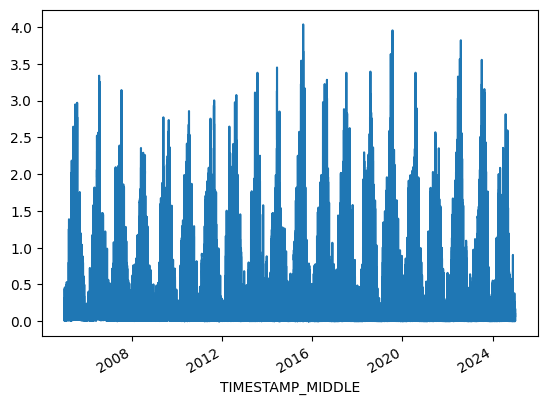

In [20]:
series = df[varname].copy()
series.plot(x_compat=True);
series

In [21]:
xlabel = f"{var} ({units})"
xlim = [series.min(), series.max()]

</br>

# Stats

## Overall mean

In [22]:
_yearly_avg = series.resample('YE').mean()
_overall_mean = _yearly_avg.mean()
_overall_sd = _yearly_avg.std()
print(f"Overall mean: {_overall_mean} +/- {_overall_sd}")

Overall mean: 0.35524207567921623 +/- 0.04715777496529011


## Yearly means

In [23]:
ym = series.resample('YE').mean()
ym

TIMESTAMP_MIDDLE
2005-12-31    0.346331
2006-12-31    0.359115
2007-12-31    0.335538
2008-12-31    0.306914
2009-12-31    0.334010
2010-12-31    0.302139
2011-12-31    0.381283
2012-12-31    0.322968
2013-12-31    0.311387
2014-12-31    0.323487
2015-12-31    0.415563
2016-12-31    0.340576
2017-12-31    0.378826
2018-12-31    0.424159
2019-12-31    0.409711
2020-12-31    0.404670
2021-12-31    0.290171
2022-12-31    0.438485
2023-12-31    0.391231
2024-12-31    0.288277
Freq: YE-DEC, Name: VPD_T1_47_1, dtype: float64

In [24]:
ym.sort_values(ascending=False)

TIMESTAMP_MIDDLE
2022-12-31    0.438485
2018-12-31    0.424159
2015-12-31    0.415563
2019-12-31    0.409711
2020-12-31    0.404670
2023-12-31    0.391231
2011-12-31    0.381283
2017-12-31    0.378826
2006-12-31    0.359115
2005-12-31    0.346331
2016-12-31    0.340576
2007-12-31    0.335538
2009-12-31    0.334010
2014-12-31    0.323487
2012-12-31    0.322968
2013-12-31    0.311387
2008-12-31    0.306914
2010-12-31    0.302139
2021-12-31    0.290171
2024-12-31    0.288277
Name: VPD_T1_47_1, dtype: float64

## Monthly averages

In [25]:
seriesdf = pd.DataFrame(series)
seriesdf['MONTH'] = seriesdf.index.month
seriesdf['YEAR'] = seriesdf.index.year
monthly_avg = seriesdf.groupby(['YEAR', 'MONTH'])[varname].mean().unstack()
monthly_avg

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2005,0.098728,0.071203,0.255526,0.368644,0.566865,0.826770,0.667390,0.451273,0.419682,0.241639,0.130418,0.038538
2006,0.065026,0.077202,0.125051,0.296425,0.418049,0.762348,1.136930,0.319461,0.448141,0.285055,0.238983,0.119354
2007,0.097568,0.151464,0.228125,0.798676,0.527100,0.484729,0.570716,0.469590,0.342726,0.202463,0.094519,0.053188
2008,0.156523,0.209550,0.180537,0.242362,0.625697,0.534153,0.644119,0.493965,0.257575,0.174711,0.103464,0.050405
2009,0.055331,0.095297,0.154754,0.515293,0.578902,0.487260,0.604620,0.783934,0.410350,0.234502,0.146221,0.067759
2010,0.031270,0.115490,0.262697,0.478771,0.275770,0.596658,0.734554,0.434073,0.368292,0.210315,0.104567,0.051532
2011,0.074444,0.160941,0.304421,0.665664,0.720928,0.539708,0.542076,0.721999,0.456061,0.173393,0.143382,0.060903
2012,0.047402,0.096555,0.436990,0.345349,0.541762,0.526570,0.529450,0.644753,0.338462,0.188343,0.112636,0.060602
2013,0.044533,0.040868,0.151234,0.300698,0.236430,0.563825,0.927839,0.680899,0.355528,0.195323,0.076643,0.150297


## Number of days below ...

In [26]:
# plotdf = df[[varname]].copy()
# plotdf = plotdf.resample('D').min()
# belowzero = plotdf.loc[plotdf[varname] < 0].copy()
# belowzero = belowzero.groupby(belowzero.index.year).count()
# belowzero["YEAR"] = belowzero.index
# belowzero
# belowzero.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} < 0°");
# display(belowzero)
# print(f"Average per year: {belowzero[varname].mean()} +/- {belowzero[varname].std():.2f} SD")

## Number of days above ...

,VPD_T1_47_1,YEAR
TIMESTAMP_MIDDLE,,
2005,23,2005
2006,21,2006
2007,9,2007
2008,7,2008
2009,13,2009
2010,11,2010
2011,13,2011
2012,11,2012
2013,15,2013


Average per year: 18.95 +/- 9.91 SD


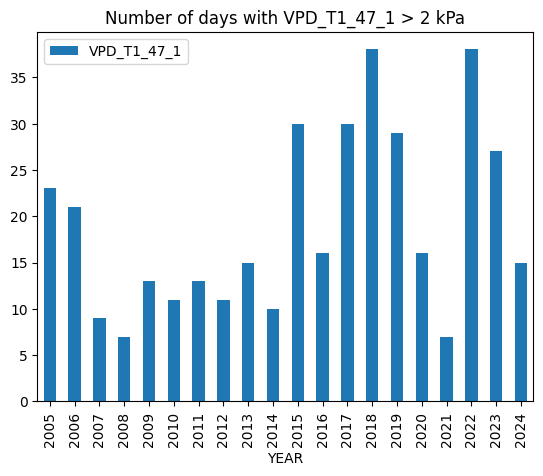

In [27]:
plotdf = df[[varname]].copy()
plotdf = plotdf.resample('D').max()
above = plotdf.loc[plotdf[varname] > 2].copy()
above = above.groupby(above.index.year).count()
above["YEAR"] = above.index
above.plot.bar(x="YEAR", y=varname, title=f"Number of days with {varname} > 2 {units}");
display(above)
print(f"Average per year: {above[varname].mean()} +/- {above[varname].std():.2f} SD")

</br>

# Heatmap plots

## Half-hourly

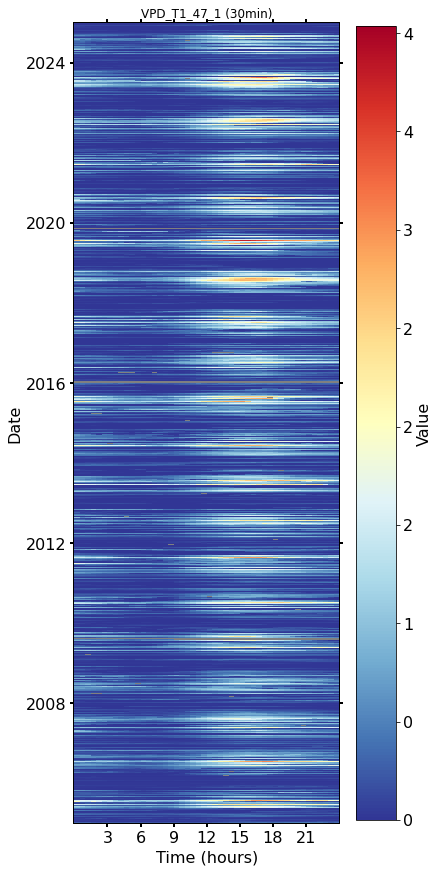

In [28]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
dv.heatmapdatetime(series=series, ax=axs, cb_digits_after_comma=0).plot()

## Monthly

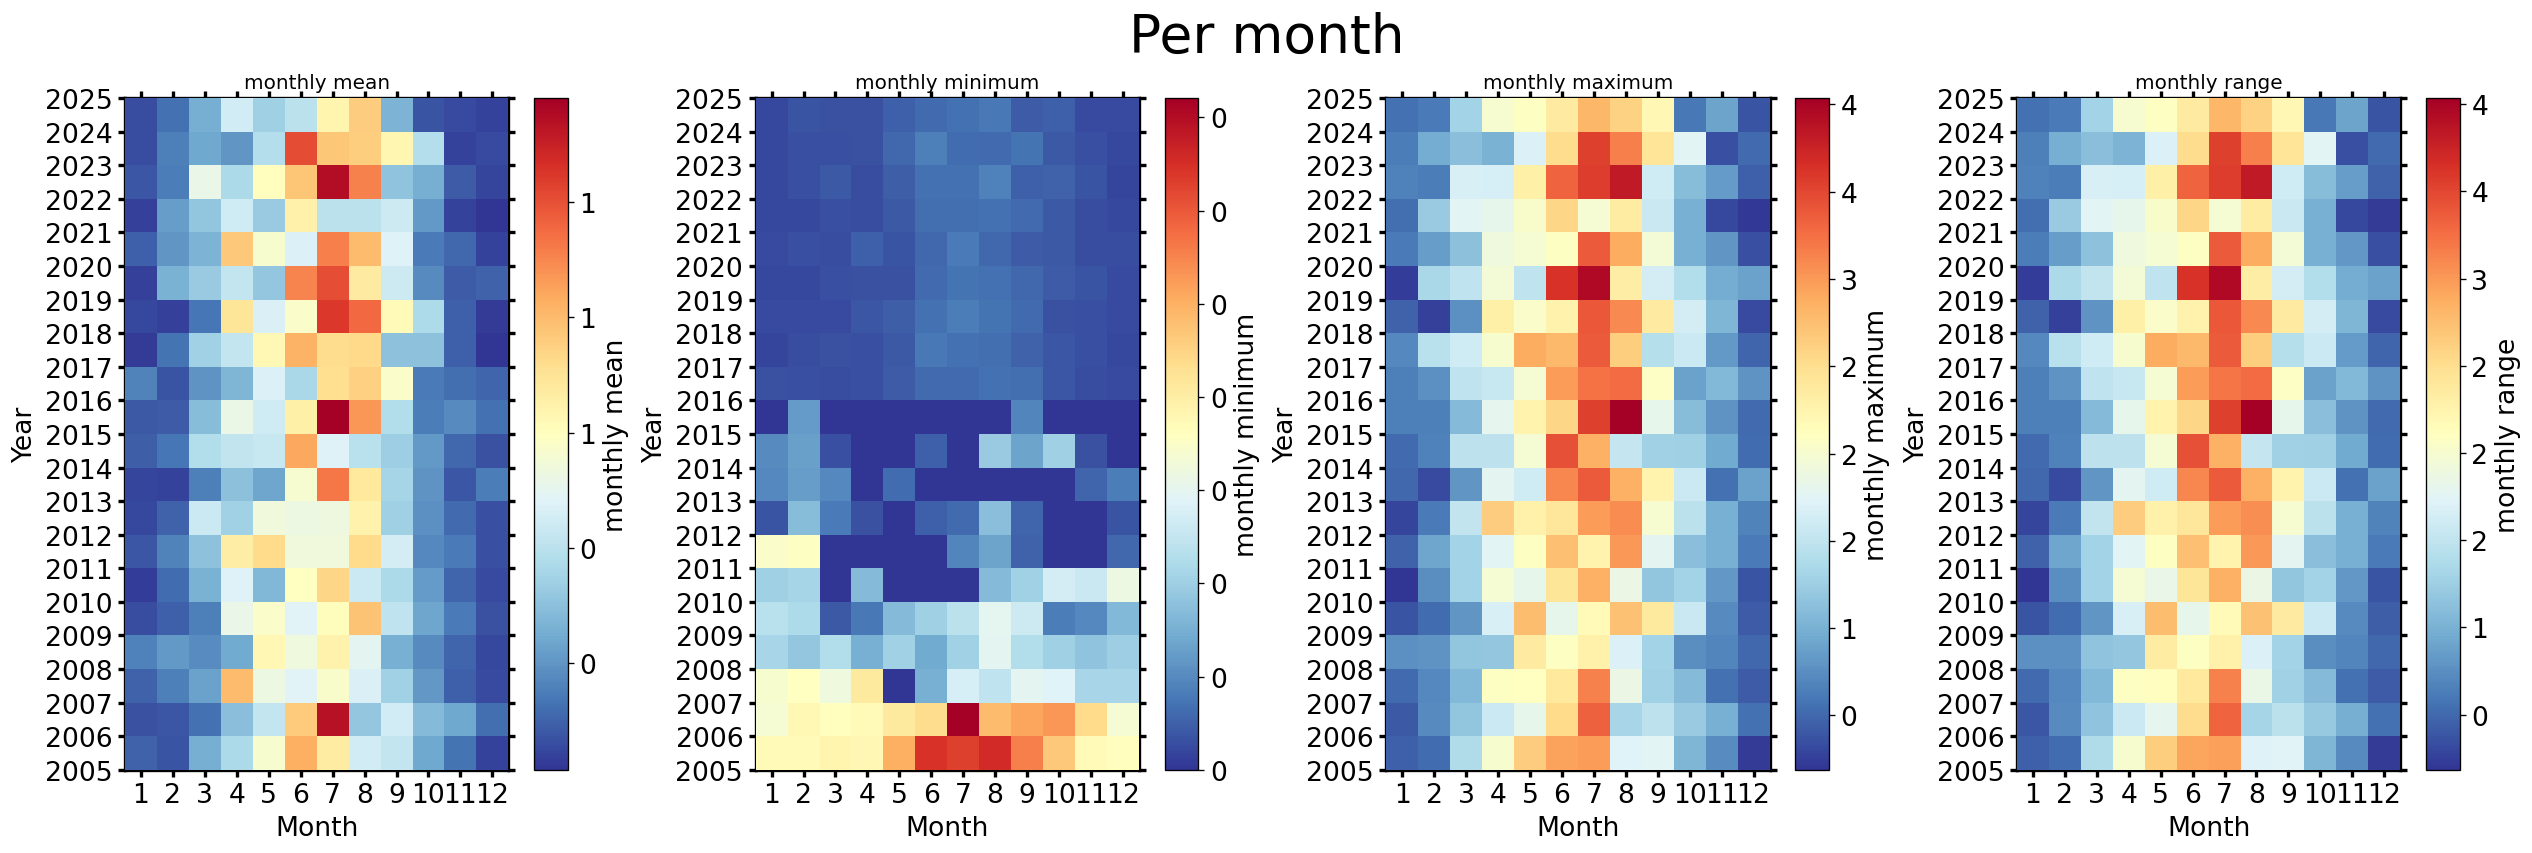

In [29]:
fig, axs = plt.subplots(ncols=4, figsize=(21, 7), dpi=120, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)
dv.heatmapyearmonth(series_monthly=series.resample('M').mean(), title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').min(), title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
dv.heatmapyearmonth(series_monthly=series.resample('M').max(), title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
_range = series.resample('M').max().sub(series.resample('M').min())
dv.heatmapyearmonth(series_monthly=_range, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

## Monthly ranks

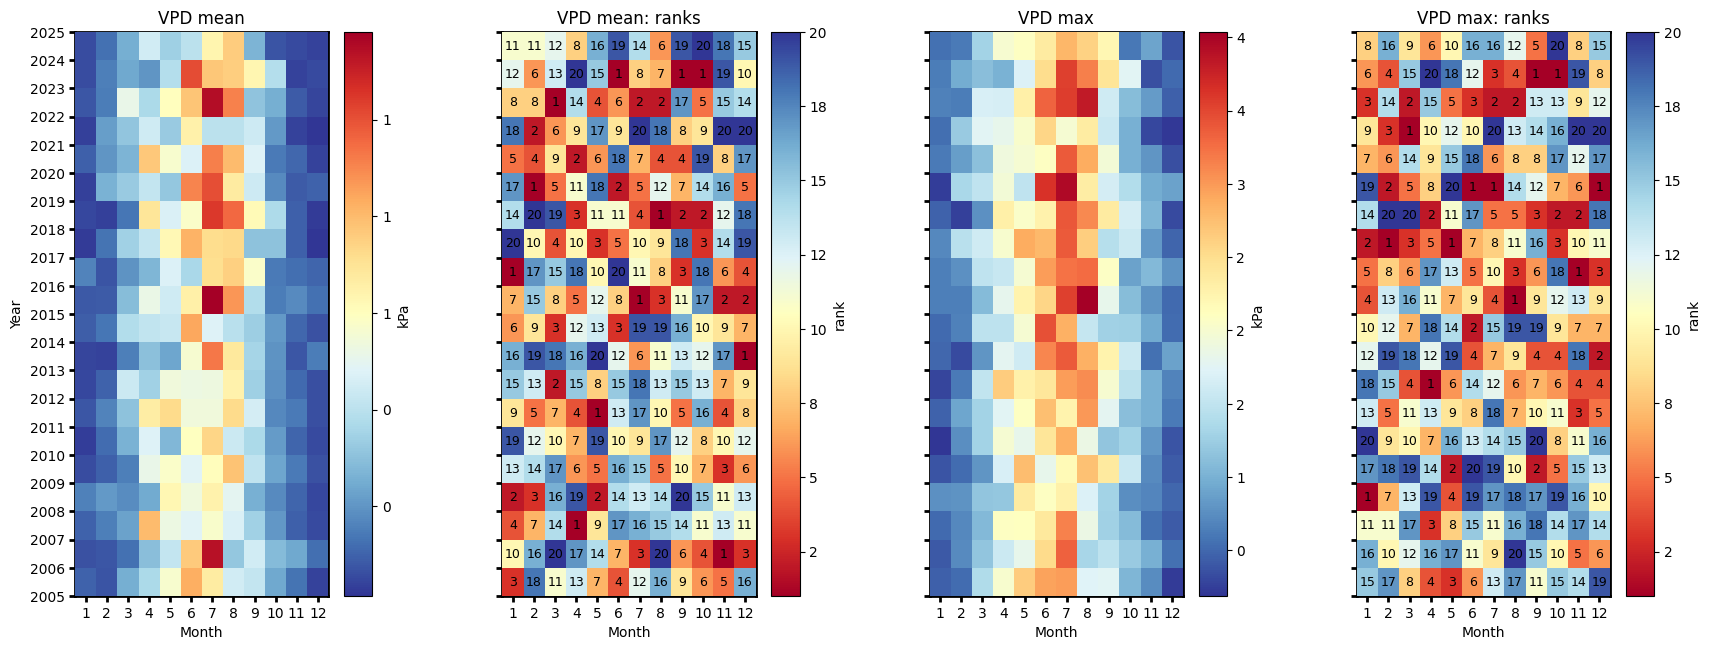

In [30]:
# Figure
fig = plt.figure(facecolor='white', figsize=(17, 6))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.35, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])
params = {'axlabels_fontsize': 10, 'ticks_labelsize': 10, 'cb_labelsize': 10}
dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel=units, cmap="RdYlBu_r", show_values=False, **params).plot()

hm_mean_ranks = dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean', show_values=True, **params)
hm_mean_ranks.plot()

dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel=units, cmap="RdYlBu_r", show_values=False, **params).plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max', show_values=True, **params).plot()

ax_mean.set_title(f"{var} mean", color='black')
ax_mean_ranks.set_title(f"{var} mean: ranks", color='black')
ax_max.set_title(f"{var} max", color='black')
ax_max_ranks.set_title(f"{var} max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

### Mean ranks per year

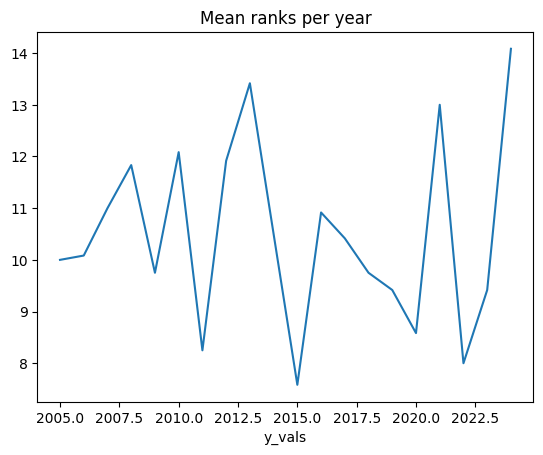

In [31]:
hm_mean_ranks.hm.get_plot_data().mean(axis=1).plot(title="Mean ranks per year");

</br>

# Ridgeline plots

## Yearly

In [ ]:
# rp = dv.ridgeline(series=series)
# rp.plot(
#     how='yearly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.50],  # min/max as list
#     hspace=-0.8,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=5,
#     fig_height=9,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per year (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Monthly

In [ ]:
# rp.plot(
#     how='monthly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.14],  # min/max as list
#     hspace=-0.6,  # overlap between months
#     xlabel=f"{var} ({units})",
#     fig_width=4.5,
#     fig_height=8,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per month (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Weekly

In [ ]:
# rp.plot(
#     how='weekly',
#     kd_kwargs=None,  # params from scikit KernelDensity as dict
#     xlim=xlim,  # min/max as list
#     ylim=[0, 0.15],  # min/max as list
#     hspace=-0.6,  # overlap
#     xlabel=f"{var} ({units})",
#     fig_width=6,
#     fig_height=16,
#     shade_percentile=0.5,
#     show_mean_line=False,
#     fig_title=f"{var} per week (2005-2024)",
#     fig_dpi=72,
#     showplot=True,
#     ascending=False
# )

## Single years per month

In [ ]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='monthly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.18],  # min/max as list
#         hspace=-0.6,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=6,
#         fig_height=7,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per month ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

## Single years per week

In [ ]:
# uniq_years = series.index.year.unique()
# for uy in uniq_years:
#     series_yr = series.loc[series.index.year == uy].copy()
#     rp = dv.ridgeline(series=series_yr)
#     rp.plot(
#         how='weekly',
#         kd_kwargs=None,  # params from scikit KernelDensity as dict
#         xlim=xlim,  # min/max as list
#         ylim=[0, 0.3],  # min/max as list
#         hspace=-0.8,  # overlap
#         xlabel=f"{var} ({units})",
#         fig_width=9,
#         fig_height=18,
#         shade_percentile=0.5,
#         show_mean_line=False,
#         fig_title=f"{var} per week ({uy})",
#         fig_dpi=72,
#         showplot=True,
#         ascending=False
#     )

</br>

# Cumulative plot

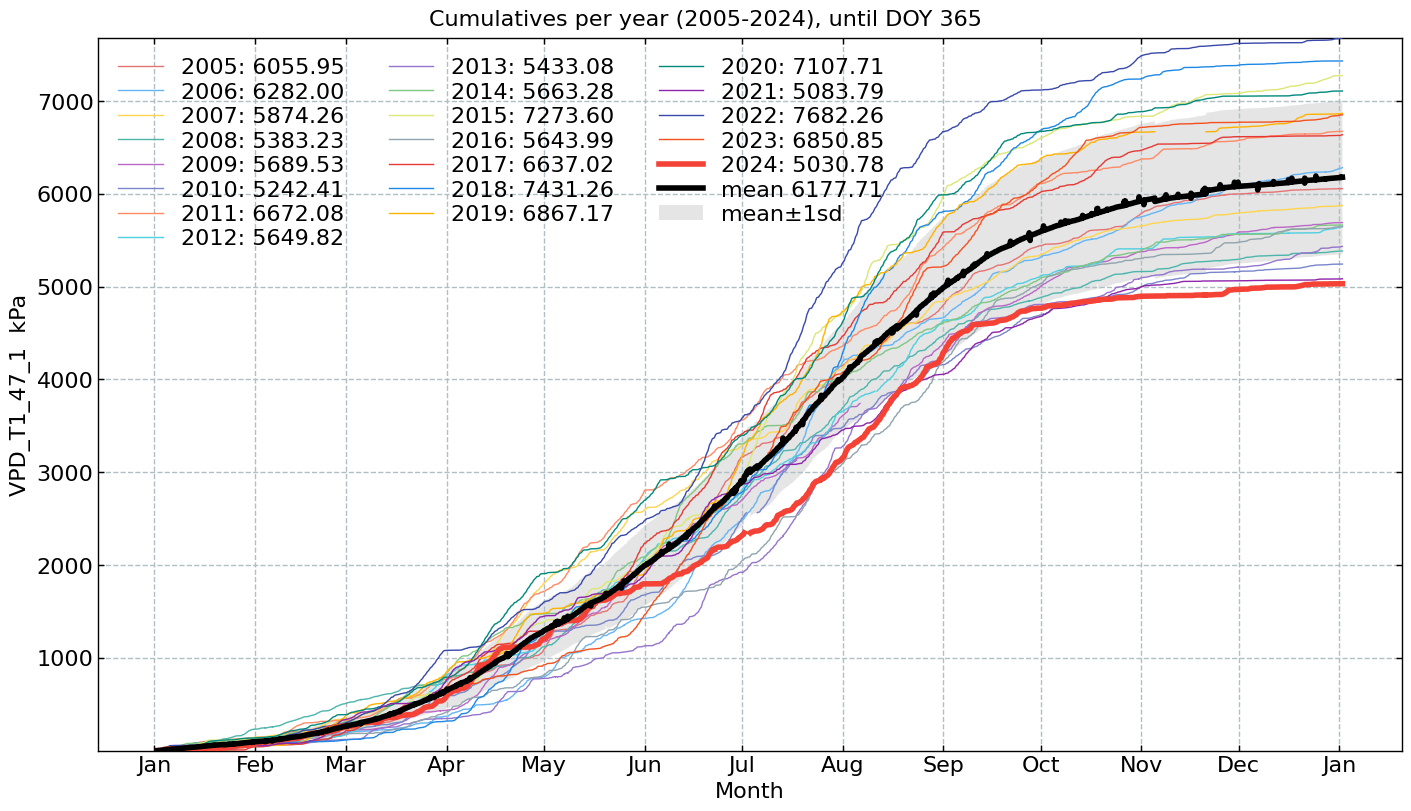

In [32]:
CumulativeYear(
    series=series,
    series_units=units,
    start_year=2005,
    end_year=2024,
    show_reference=True,
    excl_years_from_reference=None,
    highlight_year=2024,
    highlight_year_color='#F44336').plot();

</br>

# Long-term anomalies

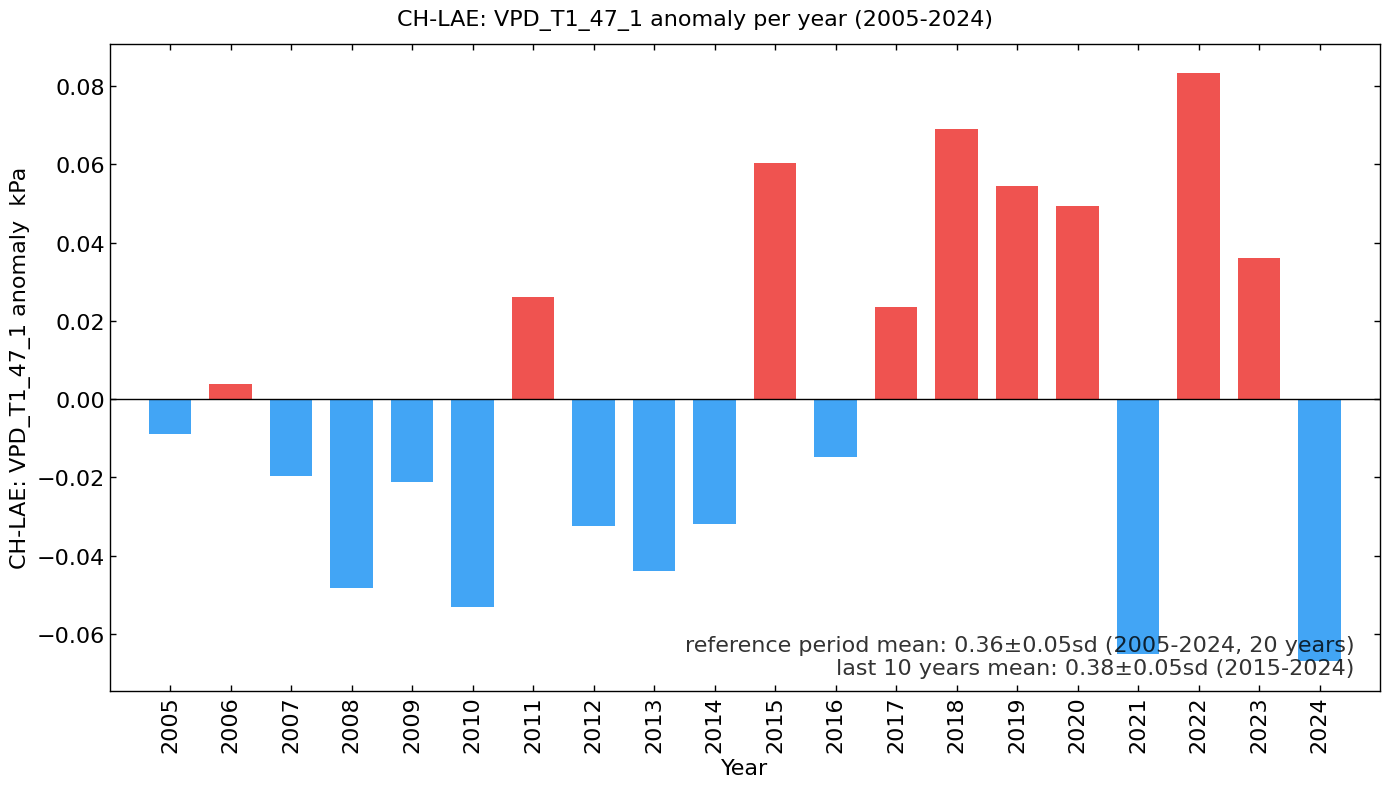

In [33]:
series_yearly_mean = series.resample('YE').mean()
series_yearly_mean.index = series_yearly_mean.index.year
series_label = f"CH-LAE: {varname}"
LongtermAnomaliesYear(series=series_yearly_mean,
                      series_label=series_label,
                      series_units=units,
                      reference_start_year=2005,
                      reference_end_year=2024).plot()

</br>

# End of notebook

In [34]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-06-11 23:57:36
